In [1]:
#Importing Libraries

import ast

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#Data cleanup

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\HP\anaconda3\envs\project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df.head(1)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None


In [8]:
df = df[df["job_title_short"] == "Data Analyst"]

df_exploded = df.explode("job_skills")

skills_stat = df_exploded.groupby ("job_skills").agg(
    skill_count = ("job_skills", "count"),
    median_salary = ("salary_year_avg", "median")
)

skills_stat = skills_stat.sort_values(by="skill_count", ascending=False).head(10)

skills_stat


,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


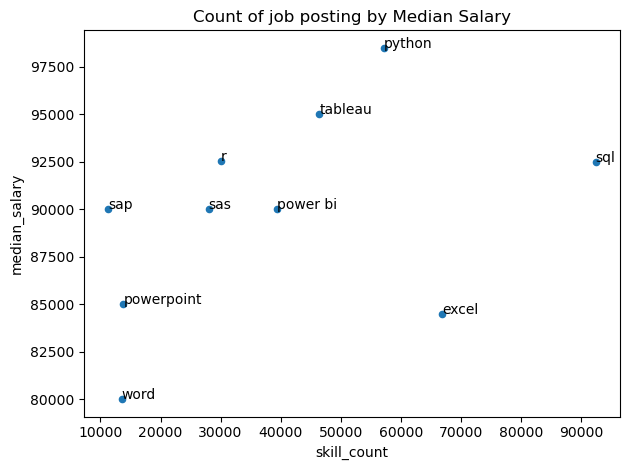

In [15]:
skills_stat.plot(kind="scatter", x = "skill_count", y="median_salary")

for i, txt in enumerate(skills_stat.index):
    plt.text(skills_stat["skill_count"].iloc[i], skills_stat["median_salary"].iloc[i], txt)

    plt.title("Count of job posting by Median Salary")
  
    plt.tight_layout()
plt.show()